# <center>`Hands on Linear Regression`</center>

## Linear Regression using Mathematical Equations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
df.shape

(237, 4)

In [17]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

#### Linear Model

In [5]:
# Mean X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

# total no of values
n = len(df)

# using formula to calculate the values of M and C
# mean_y = m*mean_x + c

num = 0
denum = 0

for i in range(n):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    denum +=  (X[i] - mean_x)**2
    
m = num / denum
c = mean_y - (m * mean_x)

# print coefficients
print("Slope (m):", m)
print("Y-intercept (c)", c)

Slope (m): 0.26342933948939945
Y-intercept (c) 325.57342104944223


#### Visualizing the model

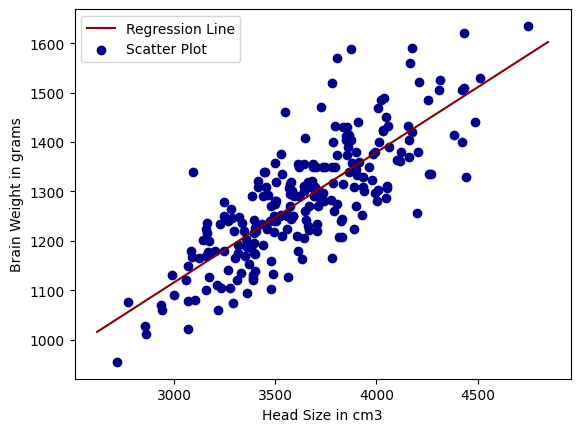

In [11]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x & y
x = np.linspace(min_x, max_x, 1000)
y = m*x + c

# plotting line
plt.plot(x, y, color="darkred", label="Regression Line")

# plotting the actual data
plt.scatter(X, Y, color="darkblue", label="Scatter Plot")

plt.xlabel("Head Size in cm3")
plt.ylabel("Brain Weight in grams")

plt.legend()
plt.show()

#### How good is our model? - R<sup>2</sup> method

In [13]:
# total sum of square
sTotal = 0

# total sum of square of residuals
sResidual = 0

# total no of data (rows)
n = len(df)

for i in range(n):
    y_pred = m*X[i] + c
    
    sTotal += (Y[i] - mean_y) ** 2
    sResidual += (Y[i] - y_pred) ** 2

r2 = 1 - (sResidual / sTotal)

print("The R-squared value is", r2)

The R-squared value is 0.6393117199570003


Since, R<sup>2</sup> value is 0.693, the actual data are somehow close to the regression line.

## Linear Regression using Sklearn library

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [21]:
# cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))

# creating model
reg = LinearRegression()

# fitting training data
reg = reg.fit(X, Y)

# Y-prediction values
Y_pred = reg.predict(X)

In [22]:
# Calculating Root Mean Squared Error & R2 score
MSE = mse(Y, Y_pred)
RMSE = np.sqrt(MSE)

r2_score = reg.score(X, Y)

print("Mean Squared Error is", MSE)
print("Root Mean Squared Error is", RMSE)
print("R2 score is", r2_score)

Mean Squared Error is 5201.3840280023305
Root Mean Squared Error is 72.1206213783709
R2 score is 0.639311719957


Since, R<sup>2</sup> value is 0.693, the actual data are somehow close to the regression line.